In [1]:
#[ドキュメント] https://gpyopt.readthedocs.io/en/latest/index.html
#[ソース] https://github.com/SheffieldML/GPyOpt/blob/master/GPyOpt/methods/bayesian_optimization.py

#pip install Gpyopt
import GPyOpt

import matplotlib.pyplot as plt
import numpy as np

# 1.目的関数

In [2]:
#目的関数定義
def f(x):
    y = (x-300)*(x-200)*(x-15)*(x-5)*(x+6)*(x+10)*(x+100)
    return y

#定義域の定義
xlim_fr = -100
xlim_to = 300

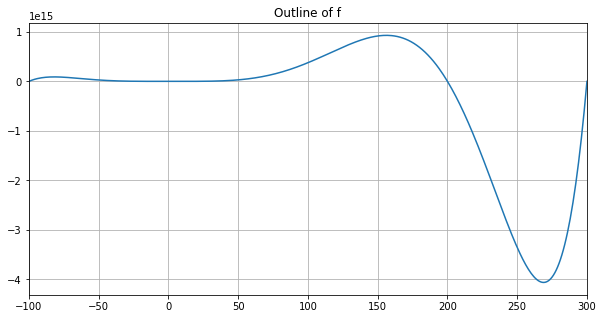

In [3]:
#グラフ
x = [i for i in range(xlim_fr , xlim_to + 1)]
y = [f(_x) for _x in x]

figsize = (10 , 5)
fig , ax = plt.subplots(1 , 1 , figsize=figsize)
ax.set_title('Outline of f')
ax.grid()
ax.plot(x , y)
ax.set_xlim(xlim_fr , xlim_to)
plt.show()

# 2. 初期データ

7
7
[[-50]
 [  0]
 [ 50]
 [100]
 [150]]
[[ 27527500000000]
 [    27000000000]
 [ 29767500000000]
 [376618000000000]
 [916110000000000]]


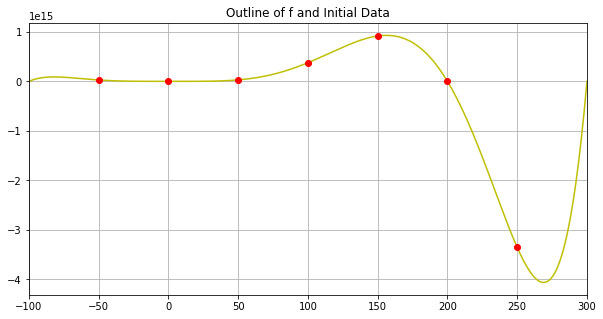

In [4]:
#初期データ
init_X = [i for i in range(-50 , 300 , 50)]
init_X_np = np.array(init_X).reshape((len(init_X) , 1))

init_Y = [f(i) for i in init_X]
init_Y_np = np.array(init_Y).reshape((len(init_Y) , 1))

print(len(init_X))
print(len(init_Y))

print(init_X_np[:5])
print(init_Y_np[:5])

#初期データの位置をplot
figsize = (10 , 5)
fig , ax = plt.subplots(1 , 1 , figsize=figsize)
ax.set_title('Outline of f and Initial Data')
ax.grid()
ax.plot(x , y , label="f" , color="y")

#初期データ
for init_x , init_y in zip(init_X , init_Y):
    ax.plot(init_x , init_y , marker="o" , color="r")

ax.set_xlim(xlim_fr , xlim_to)
plt.show()

# 3. ベイズ最適化_モデル初期化

In [5]:
# 定義域
bounds = [{'name': 'x', 'type': 'continuous', 'domain': (xlim_fr,xlim_to)}]

# X , Y : 初期データ
# initial_design_numdata : 設定する初期データの数。上記 X , Yを指定した場合は設定不要。 
# normalize_Y : 目的関数(ガウス過程)を標準化する場合はTrue。(今回は予測を真値と比較しやすくするためFalse)
myBopt = GPyOpt.methods.BayesianOptimization(f=f
                                             , domain=bounds
                                             , X=init_X_np
                                             , Y=init_Y_np
                                             , normalize_Y=False
                                             , maximize=False
                                             #, initial_design_numdata=50
                                             , acquisition_type='EI')

# 4.ベイズ最適化_train

In [6]:
myBopt.run_optimization(max_iter=10)

# 5. ベイズ最適化_学習結果・過程

In [7]:
# 得られた最適解
x_opt = myBopt.x_opt
fx_opt = myBopt.fx_opt
print("x_opt" , ":" , x_opt)
print("fx_opt" , ":" , fx_opt)

x_opt : [268.75187207]
fx_opt : -4060747866608958.5


In [8]:
# 最適化の軌跡
print("X.shape" , ":" , myBopt.X.shape)
print("Y.shape" , ":" , myBopt.Y.shape)

print("-" * 50)
print("X[:5]" , ":")
print(myBopt.X[:5])
print("-" * 50)
print("Y[:5]" , ":")
print(myBopt.Y[:5])

X.shape : (17, 1)
Y.shape : (17, 1)
--------------------------------------------------
X[:5] :
[[-50.]
 [  0.]
 [ 50.]
 [100.]
 [150.]]
--------------------------------------------------
Y[:5] :
[[2.75275e+13]
 [2.70000e+10]
 [2.97675e+13]
 [3.76618e+14]
 [9.16110e+14]]


# 6. 予測_グラフ化

In [9]:
# ガウス過程回帰モデル
model = myBopt.model.model

#予測（第一成分：mean、第二成分：std)
np_x = np.array(x).reshape(len(x) , 1)
pred = model.predict(np_x)

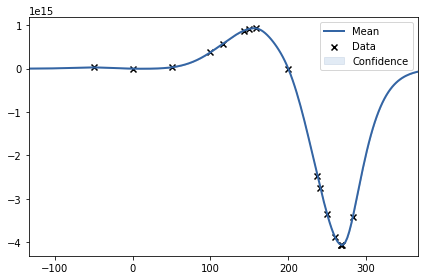

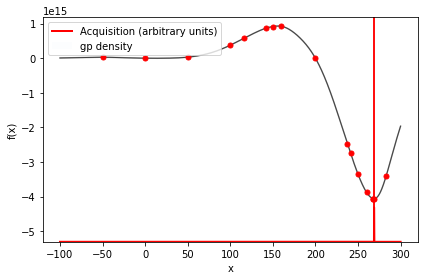

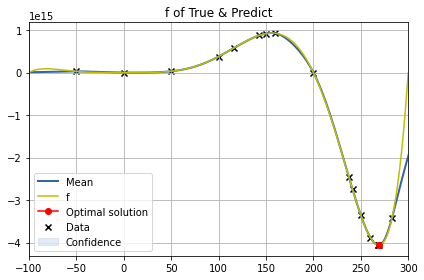

In [10]:
model.plot()
myBopt.plot_acquisition()

model.plot()
plt.plot(x , y , label="f" , color="y")
plt.plot(x_opt , fx_opt , label="Optimal solution" , marker="o" , color="r")
plt.xlim(xlim_fr , xlim_to)
plt.legend()
plt.grid()
plt.title("f of True & Predict")
plt.show()